In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
x = df.drop('label', axis=1)
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [4]:
y = df['label']
y.head()

In [5]:
df.shape

(20800, 5)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [7]:
df = df.dropna()

In [8]:
message = df.copy()

In [9]:
# after removing nan values somes records will be missing so reset the index
message.reset_index(inplace=True)

In [10]:
message['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/datalore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(message)):
    a = re.sub('[^a-zA-Z]', ' ', message['title'][i])
    a = a.lower()
    a = a.split()
    a = [ps.stem(word) for word in a if not word in stopwords.words('english')]
    a = ' '.join(a)
    corpus.append(a)

In [13]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [14]:
cv = CountVectorizer(max_features=5000, ngram_range=(1, 3))
x = cv.fit_transform(corpus).toarray()

In [15]:
x.shape

(18285, 5000)

In [16]:
y = message['label']

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.38, random_state=0)

In [18]:
cv.get_feature_names()[:20]

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [19]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [20]:
count_df = pd.DataFrame(x_train, columns=cv.get_feature_names())
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
# Multinomial NB Algorithm
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [23]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


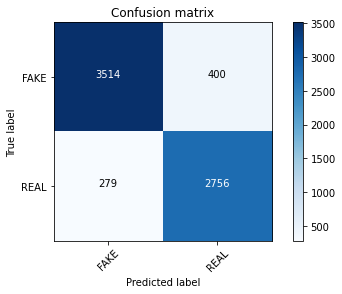

In [24]:
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [25]:
# Passive Aggresive Classifier Algorithm
from sklearn.linear_model import PassiveAggressiveClassifier
classifier2 = PassiveAggressiveClassifier()

accuracy:   0.923
Confusion matrix, without normalization


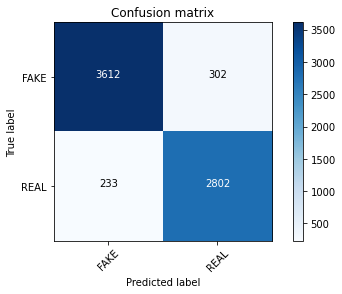

In [26]:
classifier2.fit(x_train, y_train)
pred = classifier2.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [27]:
# Multinomial Classifier with Hyperparameter
classifier=MultinomialNB(alpha=0.1)

In [28]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train,y_train)
    y_pred=sub_classifier.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.8890487839976975
Alpha: 0.1, Score : 0.9011368542236293
Alpha: 0.2, Score : 0.9011368542236293
Alpha: 0.30000000000000004, Score : 0.9011368542236293
Alpha: 0.4, Score : 0.9011368542236293
Alpha: 0.5, Score : 0.9014246654194848
Alpha: 0.6000000000000001, Score : 0.9021441934091237
Alpha: 0.7000000000000001, Score : 0.9017124766153404
Alpha: 0.8, Score : 0.9022880990070514
Alpha: 0.9, Score : 0.9022880990070514


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [29]:
feature_names = cv.get_feature_names()

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
classifier.coef_[0]
#most negative value is the most fakest word

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [31]:
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-3.9842979408071093, 'trump'),
 (-4.291882265389002, 'hillari'),
 (-4.393111156424989, 'clinton'),
 (-4.904726201980545, 'elect'),
 (-5.175118657641807, 'new'),
 (-5.255916285814933, 'comment'),
 (-5.2700408144185635, 'video'),
 (-5.3802071273958285, 'war'),
 (-5.407032770293017, 'us'),
 (-5.412485346506473, 'fbi'),
 (-5.417967816379216, 'hillari clinton'),
 (-5.474511989514489, 'vote'),
 (-5.57864515448047, 'email'),
 (-5.591640788968276, 'world'),
 (-5.598202492301565, 'obama'),
 (-5.7243316492061656, 'donald'),
 (-5.746991228987438, 'donald trump'),
 (-5.801950113268196, 'russia'),
 (-5.86010603342527, 'day'),
 (-5.868697151557587, 'presid')]

In [32]:
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.72678541756112, 'abe'),
 (-10.72678541756112, 'abroad'),
 (-10.72678541756112, 'abus new'),
 (-10.72678541756112, 'abus new york'),
 (-10.72678541756112, 'act new'),
 (-10.72678541756112, 'act new york'),
 (-10.72678541756112, 'advic'),
 (-10.72678541756112, 'advis new'),
 (-10.72678541756112, 'advis new york'),
 (-10.72678541756112, 'age new'),
 (-10.72678541756112, 'age new york'),
 (-10.72678541756112, 'agenda breitbart'),
 (-10.72678541756112, 'ail'),
 (-10.72678541756112, 'aleppo new'),
 (-10.72678541756112, 'aleppo new york'),
 (-10.72678541756112, 'ali'),
 (-10.72678541756112, 'america breitbart'),
 (-10.72678541756112, 'america new york'),
 (-10.72678541756112, 'american breitbart'),
 (-10.72678541756112, 'american new'),
 (-10.72678541756112, 'american new york'),
 (-10.72678541756112, 'ami'),
 (-10.72678541756112, 'ami schumer'),
 (-10.72678541756112, 'amp'),
 (-10.72678541756112, 'ann'),
 (-10.72678541756112, 'ann coulter'),
 (-10.72678541756112, 'applaud'),
 (-10.7267

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
x = df.drop('label', axis=1)

In [5]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
y = df['label']

In [7]:
y.head()

In [8]:
df.shape

(20800, 5)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer

In [10]:
df = df.dropna()

In [11]:
df.shape

(18285, 5)

In [12]:
message = df.copy()

In [14]:
message.reset_index(inplace=True)

In [15]:
message['text'][5]

'In these trying times, Jackie Mason is the Voice of Reason. [In this week’s exclusive clip for Breitbart News, Jackie discusses the looming threat of North Korea, and explains how President Donald Trump could win the support of the Hollywood left if the U. S. needs to strike first.  “If he decides to bomb them, the whole country will be behind him, because everybody will realize he had no choice and that was the only thing to do,” Jackie says. “Except the Hollywood left. They’ll get nauseous. ” “[Trump] could win the left over, they’ll fall in love with him in a minute. If he bombed them for a better reason,” Jackie explains. “Like if they have no transgender toilets. ” Jackie also says it’s no surprise that Hollywood celebrities didn’t support Trump’s strike on a Syrian airfield this month. “They were infuriated,” he says. “Because it might only save lives. That doesn’t mean anything to them. If it only saved the environment, or climate change! They’d be the happiest people in the wo

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/datalore/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(message)):
    a = re.sub('[^a-zA-Z]', ' ', message['title'][i])
    a = a.lower()
    a = a.split()
    a = [ps.stem(word) for word in a if not word in stopwords.words('english')]
    a = ' '.join(a)
    corpus.append(a)

In [20]:
corpus[3]

'civilian kill singl us airstrik identifi'

In [21]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
x = tfidf.fit_transform(corpus).toarray()

In [22]:
y = message['label']

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size=0.38, random_state=0)

In [25]:
tfidf.get_feature_names()[:10]

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut']

In [27]:
count_df = pd.DataFrame(x_train, columns=tfidf.get_feature_names())
count_df.head()

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
# Multinomial NB Algorithm
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [30]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.881
Confusion matrix, without normalization


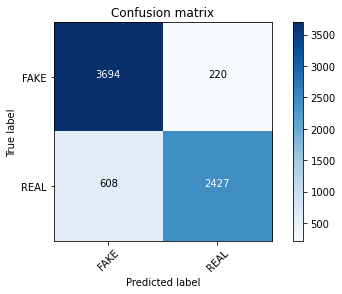

In [31]:
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [32]:
# Passive Aggresive Classifier Algorithm
from sklearn.linear_model import PassiveAggressiveClassifier
classifier2 = PassiveAggressiveClassifier()

accuracy:   0.918
Confusion matrix, without normalization


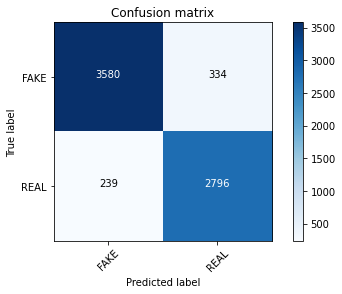

In [33]:
classifier2.fit(x_train, y_train)
pred = classifier2.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [34]:
# Multinomial Classifier with Hyperparameter
classifier=MultinomialNB(alpha=0.1)
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train,y_train)
    y_pred=sub_classifier.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.8642970211541229
Alpha: 0.1, Score : 0.876816808173838
Alpha: 0.2, Score : 0.8792632033386099
Alpha: 0.30000000000000004, Score : 0.880414448122032
Alpha: 0.4, Score : 0.8815656929054541
Alpha: 0.5, Score : 0.8821413152971651
Alpha: 0.6000000000000001, Score : 0.8821413152971651
Alpha: 0.7000000000000001, Score : 0.8817095985033818
Alpha: 0.8, Score : 0.8812778817095985
Alpha: 0.9, Score : 0.8812778817095985


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [37]:
feature_names = tfidf.get_feature_names()

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [38]:
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-4.965106593084665, 'hillari'),
 (-4.98816107270953, 'trump'),
 (-5.101007532038399, 'clinton'),
 (-5.422863320451337, 'elect'),
 (-5.732272542249743, 'video'),
 (-5.796268391717213, 'war'),
 (-5.803686540294945, 'comment'),
 (-5.837190404880973, 'us'),
 (-5.893661488712487, 'fbi'),
 (-5.896863307704287, 'hillari clinton'),
 (-5.937382522280277, 'vote'),
 (-5.984288074743004, 'world'),
 (-6.06185178711946, 'email'),
 (-6.1053379992282295, 'obama'),
 (-6.163466863741111, 'america'),
 (-6.196144450957138, 'russia'),
 (-6.252537298811644, 'day'),
 (-6.26323390921117, 'american'),
 (-6.288051551768978, 'presid'),
 (-6.310127418283985, 'break')]

In [39]:
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-9.842858799967864, 'abe'),
 (-9.842858799967864, 'abroad'),
 (-9.842858799967864, 'abus new'),
 (-9.842858799967864, 'abus new york'),
 (-9.842858799967864, 'act new'),
 (-9.842858799967864, 'act new york'),
 (-9.842858799967864, 'advic'),
 (-9.842858799967864, 'advis new'),
 (-9.842858799967864, 'advis new york'),
 (-9.842858799967864, 'age new'),
 (-9.842858799967864, 'age new york'),
 (-9.842858799967864, 'agenda breitbart'),
 (-9.842858799967864, 'ail'),
 (-9.842858799967864, 'aleppo new'),
 (-9.842858799967864, 'aleppo new york'),
 (-9.842858799967864, 'ali'),
 (-9.842858799967864, 'america breitbart'),
 (-9.842858799967864, 'america new york'),
 (-9.842858799967864, 'american breitbart'),
 (-9.842858799967864, 'american new'),
 (-9.842858799967864, 'american new york'),
 (-9.842858799967864, 'ami'),
 (-9.842858799967864, 'ami schumer'),
 (-9.842858799967864, 'amp'),
 (-9.842858799967864, 'ann'),
 (-9.842858799967864, 'ann coulter'),
 (-9.842858799967864, 'applaud'),
 (-9.84285